# Import LIB 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import DataSET

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Checking Null Values

In [3]:
dataset.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Split Independant & Dependant

In [4]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

# Split Train and Test

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# StandardScalar()

In [6]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

scale.fit_transform(X_train)
scale.fit(X_test)

StandardScaler()

# Logestic Classification

In [7]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

#finding prediction
y_pred_log = log_model.decision_function(X_test) # this function will give distance between plane and point

C:\Users\navee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVM

In [8]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf',random_state=1)
svm_model.fit(X_train,y_train)

#finding prediction
y_pred_svm = svm_model.decision_function(X_test)  # this function will give distance between plane and point

# ROC and AUC

In [9]:
from sklearn.metrics import roc_curve, auc

log_fpr, log_tpr, log_threshold = roc_curve(y_test , y_pred_log)
log_auc = auc(log_fpr, log_tpr)

svm_fpr, svm_tpr, svm_threshold = roc_curve(y_test , y_pred_svm)
svm_auc = auc(svm_fpr, svm_tpr)



#  Plot ROC & SVM

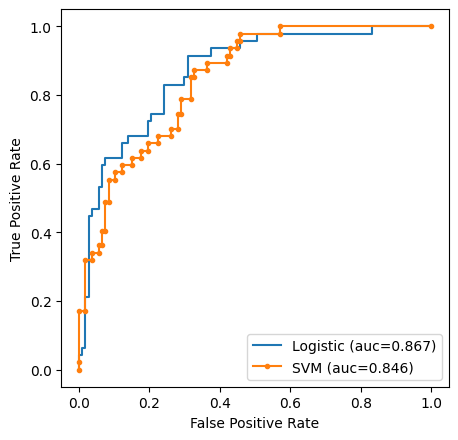

In [10]:
plt.figure(figsize=(5,5),dpi=100)

plt.plot(log_fpr, log_tpr, linestyle='-', label='Logistic (auc=%.3f)'%log_auc)
plt.plot(svm_fpr, svm_tpr, marker = '.', label='SVM (auc=%.3f)'%svm_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [11]:
# thres-hold value
print("logistic threshold values : ",log_threshold[10]) #taken from curve
print("SVM threshold values : ",svm_threshold[15]) #taken from curve


logistic threshold values :  0.6854948071515601
SVM threshold values :  -0.14959536239941906
